In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
##ikinci casede kameranın hareket ettiği küpün sabit kaldığı case


In [17]:
df = pd.read_csv('DistanceLogTest2MovingCamereYeni.csv')



In [18]:
df.head()

,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
0,3.46,0.0,1.5,1.5,0.0547,1.5649,-0.1397,1.6418,0.0000,1.6418
1,3.56,0.0,1.5,1.5,0.0511,1.5646,-0.1633,1.6653,0.0235,1.6418
2,3.66,0.0,1.5,1.5,0.0578,1.5672,-0.1838,1.6861,0.0443,1.6418
3,3.76,0.0,1.5,1.5,0.0591,1.5656,-0.2057,1.7080,0.0662,1.6418
4,3.87,0.0,1.5,1.5,0.0642,1.5707,-0.2276,1.7303,0.0884,1.6418


In [19]:
df.describe()


,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
count,459.000000,459.0,459.0,458.0,458.000000,458.000000,458.000000,458.000000,458.000000,458.0000
mean,30.341133,0.0,1.5,1.5,-1.310570,1.847222,0.568875,2.087609,0.445762,1.6418
std,15.573337,0.0,0.0,0.0,1.118955,0.206930,0.927763,0.706425,0.706430,0.0000
min,3.460000,0.0,1.5,1.5,-2.910000,1.250300,-0.523800,0.478800,-1.163100,1.6418
25%,16.830000,0.0,1.5,1.5,-2.407100,1.586775,-0.120550,1.457475,-0.184425,1.6418
50%,30.490000,0.0,1.5,1.5,-1.597300,1.974950,0.066400,2.085900,0.444100,1.6418
75%,43.880000,0.0,1.5,1.5,-0.020325,2.000175,1.544125,2.684425,1.042550,1.6418
max,56.680000,0.0,1.5,1.5,0.159500,2.068500,2.407000,3.364300,1.722400,1.6418


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             459 non-null    float64
 1   ObjectX          459 non-null    float64
 2   ObjectY          459 non-null    float64
 3   ObjectZ          458 non-null    float64
 4   CameraX          458 non-null    float64
 5   CameraY          458 non-null    float64
 6   CameraZ          458 non-null    float64
 7   Distance         458 non-null    float64
 8   DeltaDistance    458 non-null    float64
 9   InitialDistance  458 non-null    float64
dtypes: float64(10)
memory usage: 36.0 KB


In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Açıları hesapladıktan sonra tutulacak liste
angles = []

def angle_between(v1,v2):
    v1_norm = v1 / np.linalg.norm(v1)
    v2_norm = v2 / np.linalg.norm(v2)
    dot = np.dot(v1_norm, v2_norm)
    dot = np.clip(dot, -1.0, 1.0)  # Güvenli arccos için
    angle_rad = np.arccos(dot)
    return np.degrees(angle_rad)

for _, row in df.iterrows():
    v1 = np.array([row["ObjectX"], row["ObjectY"], row["ObjectZ"]])
    v2 = np.array([row["CameraX"], row["CameraY"], row["CameraZ"]])
    angle = angle_between(v1,v2)
    angles.append(angle)
df["AngleBetweenVectors"] = angles

In [23]:
df.to_csv("veri_with_angles.csv", index=False)#Yeni dosya 

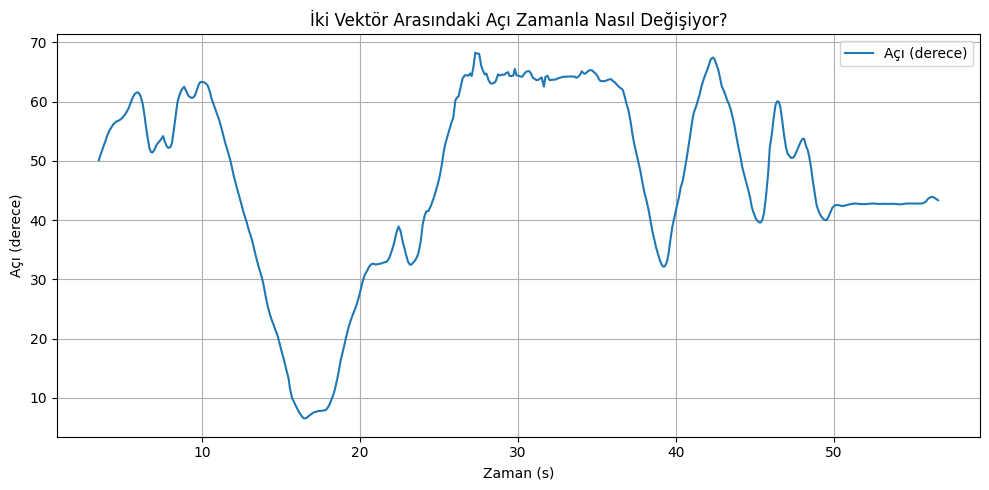

In [24]:
# Görselleştir
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["AngleBetweenVectors"], label="Açı (derece)")
plt.xlabel("Zaman (s)")
plt.ylabel("Açı (derece)")
plt.title("İki Vektör Arasındaki Açı Zamanla Nasıl Değişiyor?")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

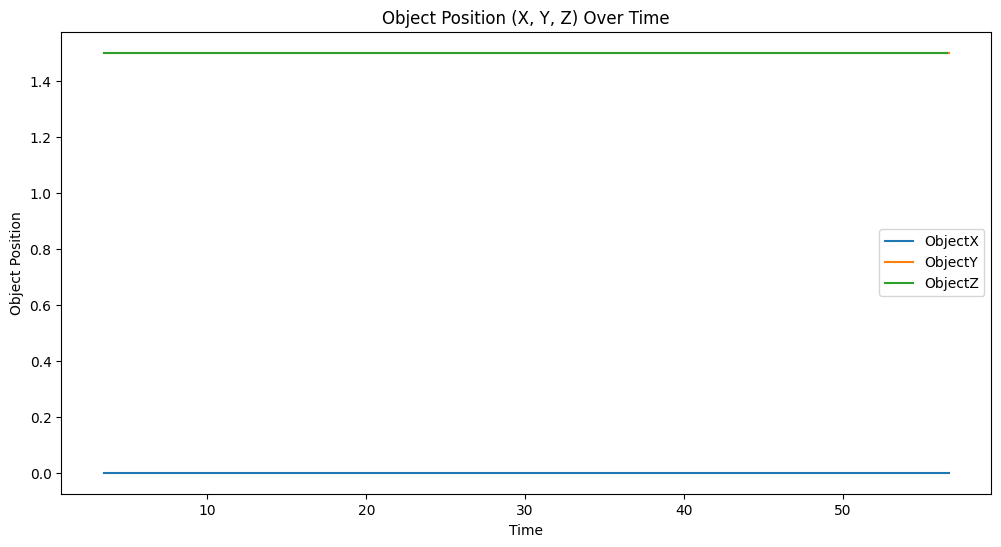

In [25]:
##OBJENİN KONUMU
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='ObjectX', data=df, label='ObjectX')
sns.lineplot(x='Time', y='ObjectY', data=df, label='ObjectY')
sns.lineplot(x='Time', y='ObjectZ', data=df, label='ObjectZ')
plt.xlabel('Time')
plt.ylabel('Object Position')
plt.title('Object Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

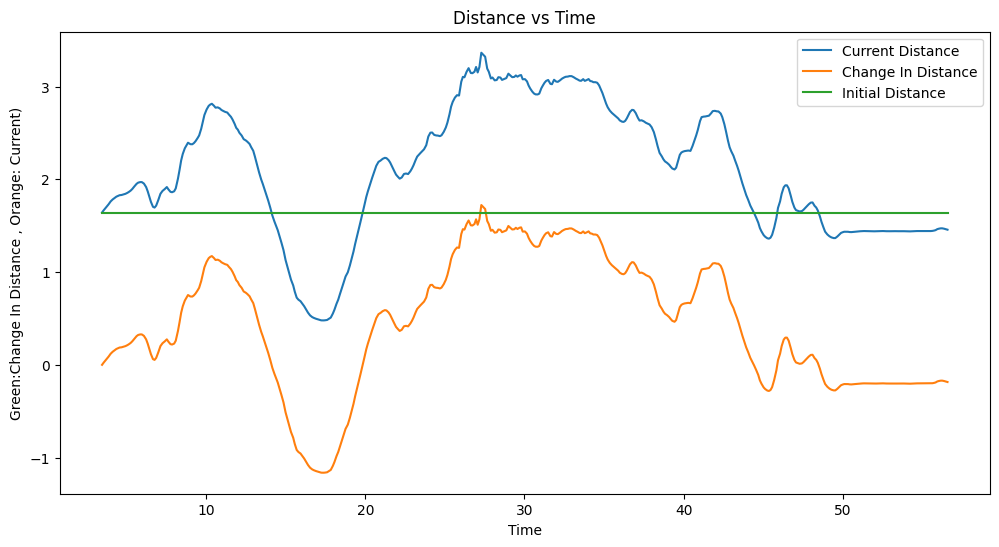

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Distance', data=df,label='Current Distance')
sns.lineplot(x='Time', y='DeltaDistance', data=df,label='Change In Distance')
sns.lineplot(x='Time', y='InitialDistance', data=df,label='Initial Distance')
plt.xlabel('Time')
plt.ylabel('Green:Change In Distance , Orange: Current)')
plt.title('Distance vs Time')
plt.legend()
plt.show()






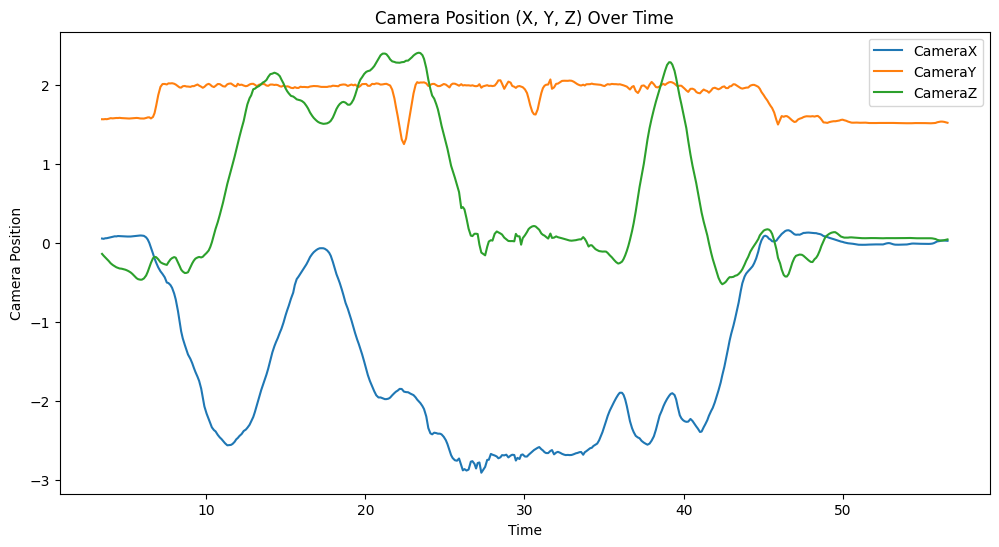

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX')
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY')
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ')
plt.xlabel('Time')
plt.ylabel('Camera Position')
plt.title('Camera Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

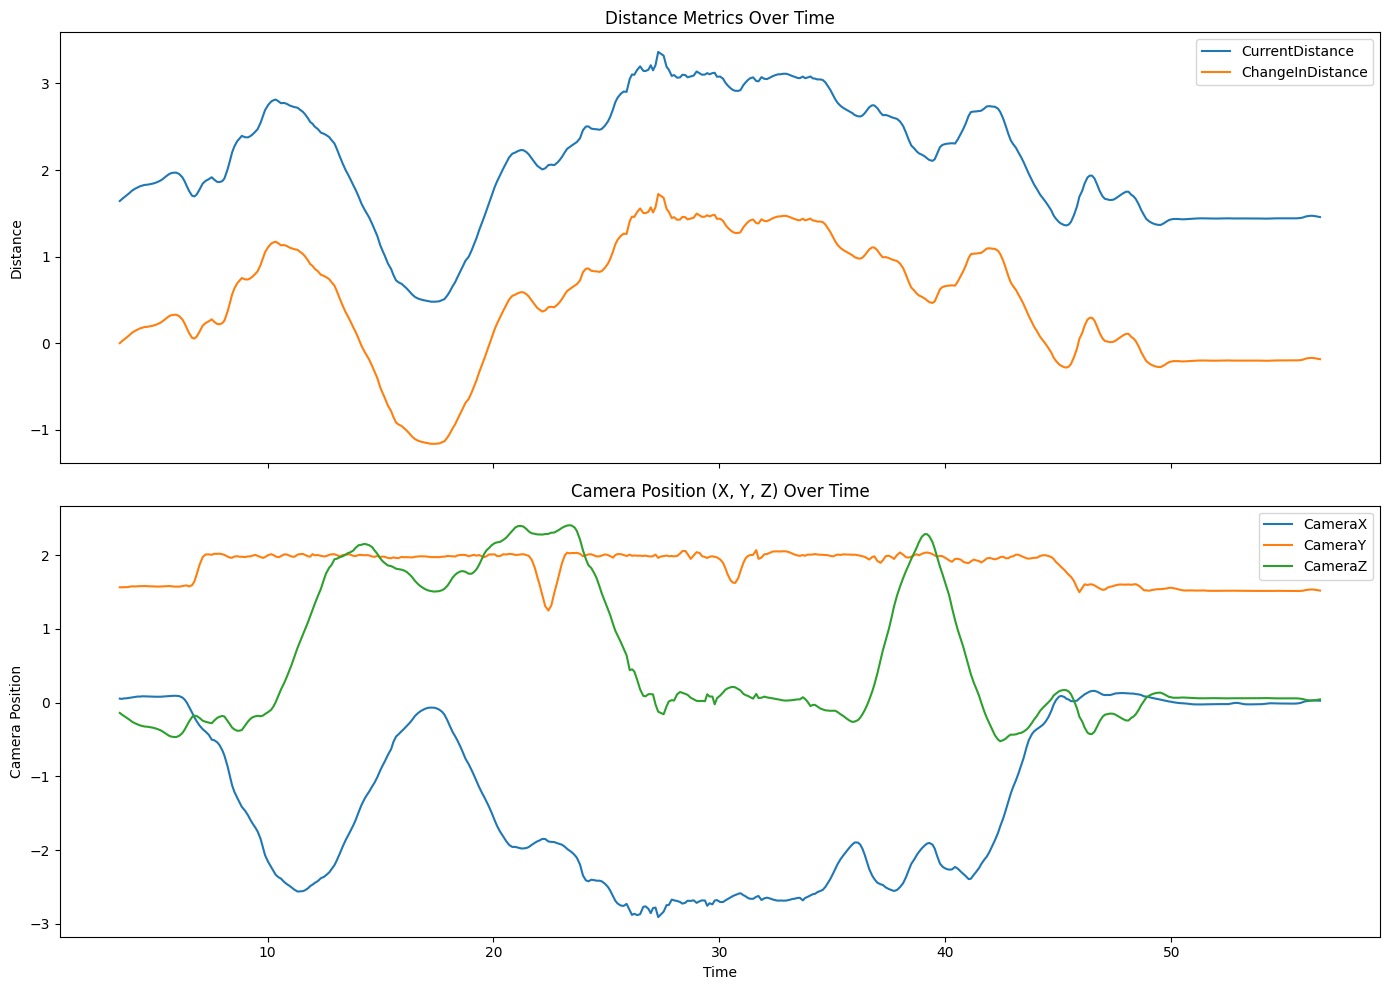

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First plot: Distances

sns.lineplot(x='Time', y='Distance', data=df, label='CurrentDistance', ax=axs[0])
sns.lineplot(x='Time', y='DeltaDistance', data=df, label='ChangeInDistance', ax=axs[0])
axs[0].set_ylabel('Distance')
axs[0].set_title('Distance Metrics Over Time')
axs[0].legend()

# Second plot: Camera positions
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX', ax=axs[1])
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY', ax=axs[1])
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ', ax=axs[1])
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Camera Position')
axs[1].set_title('Camera Position (X, Y, Z) Over Time')
axs[1].legend()

plt.tight_layout()
plt.show()